In [1]:
from langgraph.checkpoint.memory import InMemorySaver
from langgraph.graph import StateGraph,START,END
from  langchain_google_genai import ChatGoogleGenerativeAI
from langchain_mistralai import ChatMistralAI
from typing import TypedDict
from dotenv import load_dotenv
import time
import os
load_dotenv()

True

In [2]:
api_keys=[os.getenv('google'),os.getenv('mistral_ai')]

model=ChatGoogleGenerativeAI(api_key=api_keys[0],model='gemini-2.5-flash')

In [3]:
class JOKE(TypedDict):
    topic:str
    genrated_content:str
    explanation:str

In [4]:
graph=StateGraph(JOKE)
memory=InMemorySaver()

In [5]:
def generate_joke(state:JOKE) -> JOKE['genrated_content']:
    topic=state['topic']
    prompt=f"generate a joke about {topic} with punchlines"
    time.sleep(30)
    joke=model.invoke(prompt).content
    return {'genrated_content':joke}

def explain_joke(state:JOKE) -> JOKE['explanation']:
    joke=state['genrated_content']
    prompt=f"explain the joke {joke}"
    explanation=model.invoke(prompt).content
    return {'explanation':explanation}

In [6]:
graph.add_node('generate_joke',generate_joke)
graph.add_node('explain_joke',explain_joke)

graph.add_edge(START,'generate_joke')
graph.add_edge('generate_joke','explain_joke')
graph.add_edge('explain_joke',END)

workflow=graph.compile(checkpointer=memory)


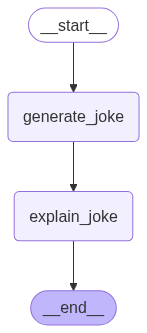

In [7]:
from IPython.display import Image

Image(workflow.get_graph().draw_mermaid_png())

In [ ]:
inital={'topic':'AI'}
config={'configurable':{'thread_id':'1'}}
try:
    workflow.invoke(inital,config=config)
except Exception as e:
    print(e)
except KeyboardInterrupt:
    print("workflow stopped")
